# Surface Lattice: Basics

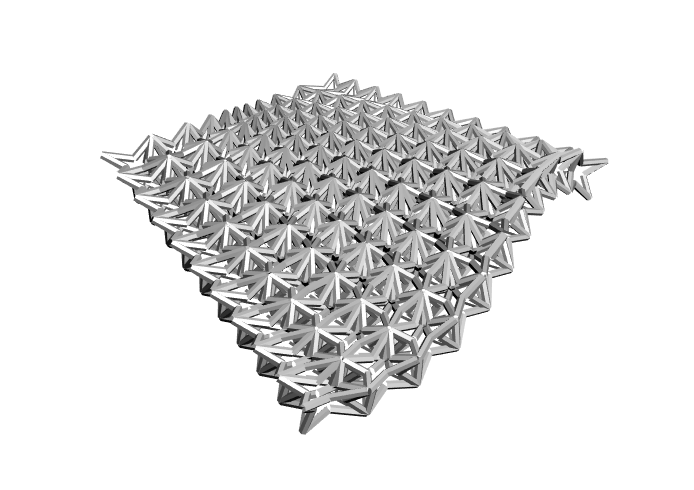

In [1]:
# install genysis library with: pip install genysis
import genysis
t = "REPLACE_WITH_YOUR_TOKEN" # replace with your valid token

# upload and visualize the base surface for the lattice
genysis.upload("models/surface1.stp","surface1.stp",t) # a NURBS surface saved as .stp format
genysis.visualize("surface1.stp",t,True)

Welcome to GENYSIS
('uploading file size:', 0.006, 'MB')
[====================================================]105%
successfully uploaded models/surface1.stp as surface1.stp
https://studiobitonti.appspot.com/apps/visualize?name=surface1.stp&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=surface1.stp&t=REPLACE_WITH_YOUR_TOKEN'

In [2]:
sl = genysis.surfaceLattice()
sl.setSurfaces("surface1.stp") # set input surface
sl.setDivision(u=10,v=10) # set UV division for the grid
sl.setHeight(2.5) # set the cell height for the grid
sl.genGrid(t) # generate the grid

genysis.visualize(sl.gridOutput,t,True) # visualize the grid

('request: ', '{"surfaces": "surface1.stp", "div_U": 10, "div_V": 10, "t": "REPLACE_WITH_YOUR_TOKEN", "output": "temp.json", "height": 2.5}')
('response: ', u'["temp.json"]\n')
https://studiobitonti.appspot.com/apps/visualize?name=temp.json&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=temp.json&t=REPLACE_WITH_YOUR_TOKEN'

In [3]:
# generate a pametric lattice unit
# the case parameter represent differenct topology of unit (0~7) 
# the rest of parameters control the shape of units, ranging from 0.0 to 1.0
genysis.genLatticeUnit(case=2,chamfer=0,centerChamfer=0,bendIn=0.5,cBendIn=0,connectPt=0,output="cell_0.obj",token=t)
genysis.visualize("cell_0.obj",t,True,300,300)

('request: ', '{"case": 2, "cBendIn": 0, "chamfer": 0, "bendIn": 0.5, "centerChamfer": 0, "filename": "cell_0.obj", "t": "REPLACE_WITH_YOUR_TOKEN", "connectPt": 0}')
('response: ', u'["cell_0.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=cell_0.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=cell_0.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [4]:
# array the lattice unit to the grid
# the lattice geometry will be save as lines in obj format
sl.setComponent("cell_0.obj")
sl.setOutput("surface_lattice_lines1.obj")
sl.populateLattice(t)

genysis.visualize("surface_lattice_lines1.obj",t,True)

('request: ', '{"EPSILON": 0.01, "component": "cell_0.obj", "filename": "surface_lattice_lines1.obj", "blendTargets": [], "boxes": "temp.json", "t": "REPLACE_WITH_YOUR_TOKEN"}')
('response: ', u'["surface_lattice_lines1.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines1.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_lines1.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [5]:
# mesh the obj lines at thickness of 0.2
genysis.marchingCube(
    lines="surface_lattice_lines1.obj",
    resolution=300,
    memberThickness=0.2,
    filename="surface_lattice_meshed.obj",
    preview=True, # set preview to False for final water-tight printable mesh
    token=t)

genysis.visualize("surface_lattice_meshed.obj",t,True)

('request: ', '{"memberThickness": 0.2, "lines": "surface_lattice_lines1.obj", "filename": "surface_lattice_meshed.obj", "t": "REPLACE_WITH_YOUR_TOKEN", "preview": true, "resolution": 300}')
('response: ', u'["surface_lattice_meshed.obj"]')
https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_meshed.obj&t=REPLACE_WITH_YOUR_TOKEN


'https://studiobitonti.appspot.com/apps/visualize?name=surface_lattice_meshed.obj&t=REPLACE_WITH_YOUR_TOKEN'

In [ ]:
# download final 3D file
genysis.download("surface_lattice_meshed.obj","models/surface_lattice_meshed.obj",t) 